# 6-1 Perceptron
# language : Python
https://www.youtube.com/watch?v=t2ym2a3pb_Y&list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E&index=6

## 0. 모델 기초

### Linear Model
$ f(w,b) = w^Tx+b $
  
### Activation Function
**Unit step Function**  
$ g(\mathbf{z})  = \begin{cases} 1, & \text{if } \mathbf{z} \ge \theta \\ 0 & \text{otherwise.} \end{cases} $
  
### Approximation
$ \hat{y} = g(f(x,b))=g(w^Tx+b)  $
  
### Perceptron update rule
For each training sample $ x_i $ :  
$ w := w + \Delta w \\ \Delta w := \alpha \cdot (y_i-\hat y_i) \cdot x_i $

$\alpha$ : learning rate in \[0,1\]



| $y$ | $\hat y$ | $y-\hat y$ |
|:-----:|:--------:|:-------:|
|1|1|0|
|1|0|1|
|0|0|0|
|0|1|-1|
-> Weights are pushed towards positive or negative target class in case of missclassification


## 1. 모델 구성

In [1]:
import numpy as np

class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init weights
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update * 1



    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        # return 1 if x >= 0 else 0
        return np.where(x>=0, 1, 0)

## 2. sample data 만들기

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print('Perceptron classification accuracy', accuracy(y_test, predictions))

Perceptron classification accuracy 1.0


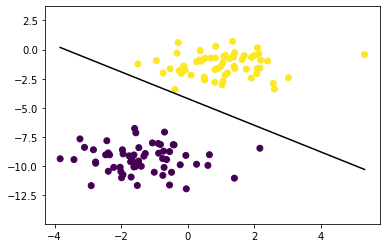

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0],X_train[:,1], marker='o', c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()